### This project focuses on performing sentiment analysis on Flipkart product reviews using natural language processing (NLP) techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("Reviews[1].csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(568454, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
df = df.drop(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'], axis=1)

In [10]:
df

,Id,Score,Summary,Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...
568449,568450,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [11]:
i = df[(df["Id"]>10000)].index
df.drop(i, axis=0, inplace=True)


In [12]:
df

,Id,Score,Summary,Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...
9995,9996,1,constipation,we switched from the advance similac to the or...
9996,9997,5,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,5,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,5,very convenient,i love the fact that i can get this delieved t...


In [13]:
df["Text"][1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [14]:
def cleantext(text):
    #step1: lower & tokenization
    token = word_tokenize(text.lower())
    
    #step2: filter all the alphabets
    ftoken = [t for t in token if(t.isalpha())]
    
    #step3: stopwords removal
    stop = stopwords.words("english")
    ctoken = [t for t in ftoken if(t not in stop)]
    
    #step4: lemmatization
    lemma = WordNetLemmatizer()
    ltoken = [lemma.lemmatize(t) for t in ctoken]
    
    #step5: joining lemma into text
    return " ".join(ltoken)

In [15]:
df["Text"] = df["Text"].apply(cleantext)

In [16]:
df["Text"][1]

'product arrived labeled jumbo salted peanut peanut actually small sized unsalted sure error vendor intended represent product jumbo'

In [17]:
df

,Id,Score,Summary,Text
0,1,5,Good Quality Dog Food,bought several vitality canned dog food produc...
1,2,1,Not as Advertised,product arrived labeled jumbo salted peanut pe...
2,3,4,"""Delight"" says it all",confection around century light pillowy citrus...
3,4,2,Cough Medicine,looking secret ingredient robitussin believe f...
4,5,5,Great taffy,great taffy great price wide assortment yummy ...
...,...,...,...,...
9995,9996,1,constipation,switched advance similac organic product think...
9996,9997,5,Constipation Not A Problem if...,like bad review say organic formula constipate...
9997,9998,5,Love this formula!,wanted solely breastfeed unable keep supplemen...
9998,9999,5,very convenient,love fact get delieved house delievy hard find...


In [18]:
df = df[df['Score'] != 3]
df['sentiment_value'] = df['Score'].apply(lambda rating : +1 if rating > 3 else 0)
df['sentiment_label'] = df['Score'].apply(lambda rating : 'positive' if rating > 3 else 'negative')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2900/3031964676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_value'] = df['Score'].apply(lambda rating : +1 if rating > 3 else 0)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2900/3031964676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'] = df['Score'].apply(lambda rating : 'positive' if rating > 3 else 'negative')


In [19]:
df

,Id,Score,Summary,Text,sentiment_value,sentiment_label
0,1,5,Good Quality Dog Food,bought several vitality canned dog food produc...,1,positive
1,2,1,Not as Advertised,product arrived labeled jumbo salted peanut pe...,0,negative
2,3,4,"""Delight"" says it all",confection around century light pillowy citrus...,1,positive
3,4,2,Cough Medicine,looking secret ingredient robitussin believe f...,0,negative
4,5,5,Great taffy,great taffy great price wide assortment yummy ...,1,positive
...,...,...,...,...,...,...
9995,9996,1,constipation,switched advance similac organic product think...,0,negative
9996,9997,5,Constipation Not A Problem if...,like bad review say organic formula constipate...,1,positive
9997,9998,5,Love this formula!,wanted solely breastfeed unable keep supplemen...,1,positive
9998,9999,5,very convenient,love fact get delieved house delievy hard find...,1,positive


(-0.5, 399.5, 199.5, -0.5)

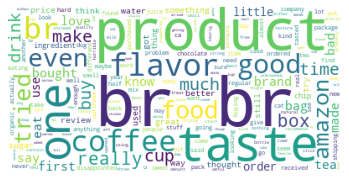

In [20]:
wc = WordCloud(background_color="white")
wc.generate(" ".join(df[df["sentiment_value"] == 0]["Text"]))
plt.imshow(wc) #im = image
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

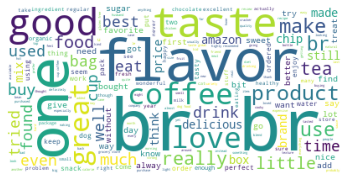

In [21]:
wc = WordCloud(background_color="white")
wc.generate(" ".join(df[df["sentiment_value"] == 1]["Text"]))
plt.imshow(wc) #im = image
plt.axis("off")

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [23]:
pipe = Pipeline(
    [
        ('CountVectorizer',CountVectorizer()),
        ('RandomForestClassifier',RandomForestClassifier())
    ]

)

In [24]:
x = df["Text"]
y = df["sentiment_value"]

In [25]:
x.shape

(9138,)

In [26]:
y.shape

(9138,)

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,test_size=0.3, random_state=0)

In [28]:
len(xtrain)

6396

In [29]:
len(xtest)

2742

In [30]:
len(ytrain)

6396

In [31]:
len(ytest)

2742

In [32]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('RandomForestClassifier', RandomForestClassifier())])

In [33]:
train = pipe.score(xtrain,ytrain)
test = pipe.score(xtest,ytest)
    
print(f"Training accuracy:{train}\nTesting accuracy:{test}")

Training accuracy:1.0
Testing accuracy:0.8876732312180889


In [34]:
pred = pipe.predict(xtest)

In [35]:
len(pred)

2742

In [36]:
len(ytest==0)

2742

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.91      0.31      0.46       427
           1       0.89      0.99      0.94      2315

    accuracy                           0.89      2742
   macro avg       0.90      0.65      0.70      2742
weighted avg       0.89      0.89      0.86      2742



In [39]:
cv = CountVectorizer()
X = cv.fit_transform(x)
X = X.toarray()
X_df = pd.DataFrame(X, columns=cv.get_feature_names())
X_df.shape

(9138, 14874)

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(X_df,y ,test_size=0.3, random_state=0)

# ML Models

In [41]:
def models(model):
    model= model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Training accuracy:{train}\nTesting accuracy:{test}")
    print(classification_report(ytest,pred))
    return model

In [42]:
# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [43]:
models(LogisticRegression())

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy:0.9917135709818636
Testing accuracy:0.9066374908825675
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       427
           1       0.93      0.96      0.95      2315

    accuracy                           0.91      2742
   macro avg       0.84      0.79      0.81      2742
weighted avg       0.90      0.91      0.90      2742



LogisticRegression()

In [44]:
models(KNeighborsClassifier())

Training accuracy:0.865697310819262
Testing accuracy:0.8358862144420132
              precision    recall  f1-score   support

           0       0.41      0.12      0.19       427
           1       0.86      0.97      0.91      2315

    accuracy                           0.84      2742
   macro avg       0.63      0.54      0.55      2742
weighted avg       0.79      0.84      0.80      2742



KNeighborsClassifier()

In [45]:
models(DecisionTreeClassifier())

Training accuracy:1.0
Testing accuracy:0.8552151714077316
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       427
           1       0.91      0.91      0.91      2315

    accuracy                           0.86      2742
   macro avg       0.72      0.72      0.72      2742
weighted avg       0.85      0.86      0.86      2742



DecisionTreeClassifier()

In [46]:
models(GaussianNB())

Training accuracy:0.7872107567229518
Testing accuracy:0.6167031363967906
              precision    recall  f1-score   support

           0       0.21      0.52      0.30       427
           1       0.88      0.63      0.74      2315

    accuracy                           0.62      2742
   macro avg       0.54      0.58      0.52      2742
weighted avg       0.77      0.62      0.67      2742



GaussianNB()

In [47]:
models(BernoulliNB())

Training accuracy:0.8735146966854284
Testing accuracy:0.8486506199854121
              precision    recall  f1-score   support

           0       0.52      0.32      0.39       427
           1       0.88      0.95      0.91      2315

    accuracy                           0.85      2742
   macro avg       0.70      0.63      0.65      2742
weighted avg       0.83      0.85      0.83      2742



BernoulliNB()

In [48]:
models(MultinomialNB())

Training accuracy:0.9362101313320825
Testing accuracy:0.888037928519329
              precision    recall  f1-score   support

           0       0.72      0.45      0.56       427
           1       0.91      0.97      0.94      2315

    accuracy                           0.89      2742
   macro avg       0.81      0.71      0.75      2742
weighted avg       0.88      0.89      0.88      2742



MultinomialNB()

In [49]:
models(AdaBoostClassifier())

Training accuracy:0.8788305190744216
Testing accuracy:0.8862144420131292
              precision    recall  f1-score   support

           0       0.74      0.42      0.53       427
           1       0.90      0.97      0.94      2315

    accuracy                           0.89      2742
   macro avg       0.82      0.69      0.73      2742
weighted avg       0.88      0.89      0.87      2742



AdaBoostClassifier()

In [50]:
models(GradientBoostingClassifier())

Training accuracy:0.8822701688555347
Testing accuracy:0.8767323121808899
              precision    recall  f1-score   support

           0       0.85      0.25      0.39       427
           1       0.88      0.99      0.93      2315

    accuracy                           0.88      2742
   macro avg       0.86      0.62      0.66      2742
weighted avg       0.87      0.88      0.85      2742



GradientBoostingClassifier()

In [51]:
accuracy_scores = pd.DataFrame({'Models':['Pipeline','Logistic Regression',"KNeighborsClassifier","DecisionTreeClassifier","GaussianNB","BernoulliNB","MultinomialNB","AdaBoostClassifier","GradientBoostingClassifier"],
                                 'Train Accuracy Score':[0.1,0.99,0.86,0.1,0.78,0.87,0.93,0.87,0.88],
                                   'Test Accuracy Score':[0.88,0.90,0.83,0.84,0.61,0.84,0.88,0.88,0.87]})
accuracy_scores

,Models,Train Accuracy Score,Test Accuracy Score
0,Pipeline,0.10,0.88
1,Logistic Regression,0.99,0.90
2,KNeighborsClassifier,0.86,0.83
3,DecisionTreeClassifier,0.10,0.84
4,GaussianNB,0.78,0.61
5,BernoulliNB,0.87,0.84
6,MultinomialNB,0.93,0.88
7,AdaBoostClassifier,0.87,0.88
8,GradientBoostingClassifier,0.88,0.87


# DL Models

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,GRU,LSTM, Dropout, Embedding

In [54]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=1)

In [55]:
sentlen = []

for sent in df["Text"]:
      sentlen.append(len(word_tokenize(sent)))  # we are using the word tokenize to split the sentences in words 

df["SentLen"] = sentlen 
df.head()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2900/62877168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SentLen"] = sentlen


,Id,Score,Summary,Text,sentiment_value,sentiment_label,SentLen
0,1,5,Good Quality Dog Food,bought several vitality canned dog food produc...,1,positive,23
1,2,1,Not as Advertised,product arrived labeled jumbo salted peanut pe...,0,negative,18
2,3,4,"""Delight"" says it all",confection around century light pillowy citrus...,1,positive,39
3,4,2,Cough Medicine,looking secret ingredient robitussin believe f...,0,negative,18
4,5,5,Great taffy,great taffy great price wide assortment yummy ...,1,positive,13


In [56]:
max(sentlen)   # the review which have maximum no.of words

879

In [57]:
np.quantile(sentlen, 0.95)  #0.95 of the words in doc has len equals to 38

98.0

In [58]:
max_len = np.quantile(sentlen, 0.95)
max_len

98.0

In [59]:
tok = Tokenizer(char_level=False, split=" ")
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'br',
 2: 'like',
 3: 'coffee',
 4: 'taste',
 5: 'good',
 6: 'flavor',
 7: 'one',
 8: 'great',
 9: 'product',
 10: 'love',
 11: 'food',
 12: 'would',
 13: 'make',
 14: 'tea',
 15: 'really',
 16: 'get',
 17: 'time',
 18: 'best',
 19: 'use',
 20: 'much',
 21: 'cup',
 22: 'chip',
 23: 'bag',
 24: 'little',
 25: 'also',
 26: 'tried',
 27: 'price',
 28: 'amazon',
 29: 'buy',
 30: 'find',
 31: 'try',
 32: 'drink',
 33: 'brand',
 34: 'better',
 35: 'dog',
 36: 'well',
 37: 'even',
 38: 'chocolate',
 39: 'store',
 40: 'mix',
 41: 'water',
 42: 'first',
 43: 'sugar',
 44: 'favorite',
 45: 'could',
 46: 'made',
 47: 'box',
 48: 'hot',
 49: 'eat',
 50: 'year',
 51: 'found',
 52: 'go',
 53: 'bought',
 54: 'used',
 55: 'sweet',
 56: 'day',
 57: 'say',
 58: 'recommend',
 59: 'many',
 60: 'way',
 61: 'milk',
 62: 'delicious',
 63: 'pack',
 64: 'thing',
 65: 'want',
 66: 'give',
 67: 'bit',
 68: 'think',
 69: 'order',
 70: 'still',
 71: 'work',
 72: 'since',
 73: 'got',
 74: 'know',
 75: 'two',
 7

In [60]:
tok.index_word[1652]

'belly'

In [61]:
vocab_len = len(tok.index_word)
vocab_len

12629

In [62]:
len(xtrain)

6396

In [63]:
seqtrain = tok.texts_to_sequences(xtrain)  # step1

In [64]:
seqtrain[1]

[289,
 74,
 421,
 35,
 11,
 1247,
 33,
 2,
 2081,
 1902,
 2188,
 7289,
 850,
 3993,
 76,
 2,
 350,
 1180,
 156,
 1354,
 133,
 944,
 133,
 55,
 127,
 409,
 880,
 2974,
 1012,
 458,
 251,
 912,
 1,
 1,
 4,
 865,
 5557,
 866,
 35,
 109,
 1902,
 7290,
 305,
 274,
 13,
 470,
 965,
 296,
 190,
 2570,
 79,
 1828,
 49,
 42,
 1317,
 75,
 4635,
 67,
 1149,
 773,
 334,
 5557,
 866,
 1392,
 37,
 176,
 1902,
 867,
 154,
 7291,
 5558,
 929,
 1,
 1,
 46,
 1439,
 444,
 1214,
 35,
 11,
 375,
 929,
 2188,
 12,
 5559,
 219,
 121,
 84,
 110,
 2,
 8,
 2082,
 1105,
 506,
 7292,
 1288,
 358,
 108,
 4636,
 2760,
 5560]

In [65]:
seqmattrain = sequence.pad_sequences(seqtrain, maxlen =int(max_len)) # step2
seqmattrain.shape, ytrain.shape

((6396, 98), (6396,))

In [66]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest, maxlen=int(max_len))
seqmattest

array([[   0,    0,    0, ...,   13,  448, 5465],
       [   0,    0,    0, ...,   77,   56,  509],
       [   0,    0,    0, ...,  186,   14,   90],
       ...,
       [   0,    0,    0, ..., 2312,    4,    8],
       [   0,    0,    0, ...,  208,  651,  406],
       [   0,    0,    0, ...,   27,    8,    9]])

In [67]:
seqmattrain.shape

(6396, 98)

In [68]:
ytrain.shape

(6396,)

In [69]:
vocab_len

12629

In [70]:
max_len

98.0

In [71]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True))
rnn.add(SimpleRNN(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

pred = rnn.predict(seqmattest)
                                                                                     
pred = pred>0.5


Epoch 1/50
128/128 [==============================] - 26s 176ms/step - loss: 0.4556
Epoch 2/50
128/128 [==============================] - 22s 176ms/step - loss: 0.2227
Epoch 3/50
128/128 [==============================] - 23s 179ms/step - loss: 0.0477
Epoch 4/50
128/128 [==============================] - 22s 175ms/step - loss: 0.0085
Epoch 5/50
128/128 [==============================] - 23s 179ms/step - loss: 0.0029
Epoch 6/50
128/128 [==============================] - 24s 186ms/step - loss: 0.0019
Epoch 7/50
128/128 [==============================] - 24s 184ms/step - loss: 0.0013
Epoch 8/50
128/128 [==============================] - 23s 182ms/step - loss: 0.0012
Epoch 9/50
128/128 [==============================] - 23s 177ms/step - loss: 8.8658e-04
Epoch 10/50
128/128 [==============================] - 23s 177ms/step - loss: 8.3123e-04
Epoch 11/50
128/128 [==============================] - 23s 176ms/step - loss: 7.7510e-04
Epoch 12/50
128/128 [==============================] - 22s 175

In [72]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60       461
           1       0.91      0.97      0.93      2281

    accuracy                           0.89      2742
   macro avg       0.83      0.73      0.77      2742
weighted avg       0.88      0.89      0.88      2742



In [73]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True))

rnn.add(LSTM(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/50
128/128 [==============================] - 38s 240ms/step - loss: 0.3924
Epoch 2/50
128/128 [==============================] - 29s 230ms/step - loss: 0.1601
Epoch 3/50
128/128 [==============================] - 29s 230ms/step - loss: 0.0636
Epoch 4/50
128/128 [==============================] - 30s 232ms/step - loss: 0.0274
Epoch 5/50
128/128 [==============================] - 29s 229ms/step - loss: 0.0143
Epoch 6/50
128/128 [==============================] - 29s 228ms/step - loss: 0.0075
Epoch 7/50
128/128 [==============================] - 29s 230ms/step - loss: 0.0039
Epoch 8/50
128/128 [==============================] - 29s 229ms/step - loss: 0.0053
Epoch 9/50
128/128 [==============================] - 29s 227ms/step - loss: 0.0050
Epoch 10/50
128/128 [==============================] - 29s 229ms/step - loss: 0.0034
Epoch 11/50
128/128 [==============================] - 30s 231ms/step - loss: 0.0012
Epoch 12/50
128/128 [==============================] - 30s 232ms/step - lo

In [74]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       461
           1       0.92      0.95      0.93      2281

    accuracy                           0.89      2742
   macro avg       0.81      0.78      0.79      2742
weighted avg       0.89      0.89      0.89      2742



In [77]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True))

rnn.add(GRU(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/50
128/128 [==============================] - 24s 154ms/step - loss: 0.4303
Epoch 2/50
128/128 [==============================] - 20s 160ms/step - loss: 0.1958
Epoch 3/50
128/128 [==============================] - 19s 152ms/step - loss: 0.0767
Epoch 4/50
128/128 [==============================] - 20s 155ms/step - loss: 0.0292
Epoch 5/50
128/128 [==============================] - 21s 160ms/step - loss: 0.0113
Epoch 6/50
128/128 [==============================] - 22s 171ms/step - loss: 0.0047
Epoch 7/50
128/128 [==============================] - 21s 168ms/step - loss: 0.0015
Epoch 8/50
128/128 [==============================] - 22s 170ms/step - loss: 0.0013
Epoch 9/50
128/128 [==============================] - 21s 164ms/step - loss: 7.1342e-04
Epoch 10/50
128/128 [==============================] - 22s 172ms/step - loss: 6.3645e-04
Epoch 11/50
128/128 [==============================] - 22s 170ms/step - loss: 6.5455e-04
Epoch 12/50
128/128 [==============================] - 23s 176

In [78]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64       461
           1       0.92      0.95      0.93      2281

    accuracy                           0.89      2742
   macro avg       0.81      0.77      0.79      2742
weighted avg       0.88      0.89      0.88      2742

